In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/Dataset aclImdb/aclImdb_v1.tar.gz" /content/

In [3]:
import tarfile

tar = tarfile.open("aclImdb_v1.tar.gz", "r:gz")
tar.extractall()
tar.close()

In [4]:
import os
print(os.listdir("/content/aclImdb/train"))

['urls_unsup.txt', 'urls_neg.txt', 'neg', 'urls_pos.txt', 'labeledBow.feat', 'unsupBow.feat', 'pos', 'unsup']


In [5]:
import os
import re
import numpy as np

def load_data(folder_path):
    texts, labels = [], []
    for label_type in ['pos', 'neg']:
        dir_path = os.path.join(folder_path, label_type)
        label = 1 if label_type == 'pos' else 0
        for fname in os.listdir(dir_path):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_path, fname), encoding='utf-8') as f:
                    text = f.read()
                    text = re.sub(r"<br />", " ", text)
                    text = re.sub(r"[^a-zA-Z']", " ", text)
                    texts.append(text.lower())
                    labels.append(label)
    return texts, labels

train_texts, train_labels = load_data("/content/aclImdb/train")
test_texts, test_labels = load_data("/content/aclImdb/test")

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(20000, 128, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 135s 670ms/step - accuracy: 0.6854 - loss: 0.5638 - val_accuracy: 0.8652 - val_loss: 0.3172
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 128s 653ms/step - accuracy: 0.9179 - loss: 0.2267 - val_accuracy: 0.8684 - val_loss: 0.3122
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 652ms/step - accuracy: 0.9536 - loss: 0.1409 - val_accuracy: 0.8447 - val_loss: 0.4791
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 145s 669ms/step - accuracy: 0.9646 - loss: 0.1044 - val_accuracy: 0.8461 - val_loss: 0.4892
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 671ms/step - accuracy: 0.9722 - loss: 0.0849 - val_accuracy: 0.7914 - val_loss: 0.4582


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense

# Model CNN
cnn_model = Sequential([
    Embedding(20000, 128, input_length=200),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
cnn_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 90s 451ms/step - accuracy: 0.6174 - loss: 0.6333 - val_accuracy: 0.8380 - val_loss: 0.3796
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 84s 427ms/step - accuracy: 0.8583 - loss: 0.3379 - val_accuracy: 0.8643 - val_loss: 0.3152
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 144s 439ms/step - accuracy: 0.9252 - loss: 0.2055 - val_accuracy: 0.8612 - val_loss: 0.3291
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 145s 454ms/step - accuracy: 0.9653 - loss: 0.1167 - val_accuracy: 0.8560 - val_loss: 0.3729
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 87s 444ms/step - accuracy: 0.9834 - loss: 0.0628 - val_accuracy: 0.8504 - val_loss: 0.4315


In [12]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"Akurasi CNN: {cnn_acc*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8559 - loss: 0.4044
Akurasi CNN: 85.04%


In [13]:
import pandas as pd

results = {
    "Model": ["LSTM", "CNN"],
    "Akurasi (%)": [86.8, 85.04]
}

df = pd.DataFrame(results)
print(df)

  Model  Akurasi (%)
0  LSTM        86.80
1   CNN        85.04


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 89s 444ms/step - accuracy: 0.6066 - loss: 0.6377 - val_accuracy: 0.8326 - val_loss: 0.3836
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 450ms/step - accuracy: 0.8527 - loss: 0.3472 - val_accuracy: 0.8668 - val_loss: 0.3146
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 91s 466ms/step - accuracy: 0.9229 - loss: 0.2115 - val_accuracy: 0.8626 - val_loss: 0.3274
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 140s 458ms/step - accuracy: 0.9631 - loss: 0.1235 - val_accuracy: 0.8573 - val_loss: 0.3673
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 452ms/step - accuracy: 0.9811 - loss: 0.0683 - val_accuracy: 0.8501 - val_loss: 0.4274
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8412 - loss: 0.4573
Akurasi CNN: 85.01%


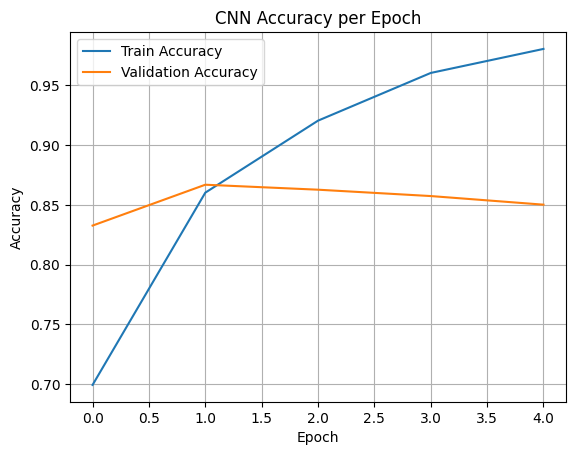

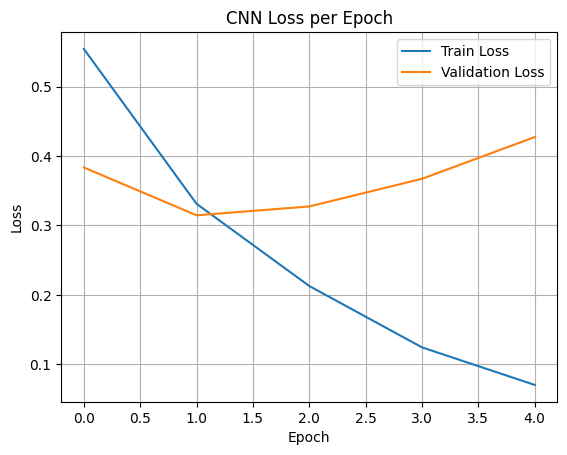

In [20]:
# 1. Import semua library yang dibutuhkan
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
import matplotlib.pyplot as plt

# 2. Buat arsitektur CNN
cnn_model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=200),  # input_length bisa dihilangkan
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 3. Kompilasi model
cnn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 4. Latih model dan simpan historinya
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test, y_test)
)

# 5. Evaluasi model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"Akurasi CNN: {cnn_acc * 100:.2f}%")

# 6. Tampilkan grafik akurasi per epoch
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 7. Tampilkan grafik loss per epoch
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import pandas as pd

model_results = {
    "Model": ["LSTM", "CNN"],
    "Akurasi (%)": [86.8, 85.04]
}

df_models = pd.DataFrame(model_results)
print(df_models)

  Model  Akurasi (%)
0  LSTM        86.80
1   CNN        85.04
